In [1]:
from statsmodels.tsa.stattools import adfuller


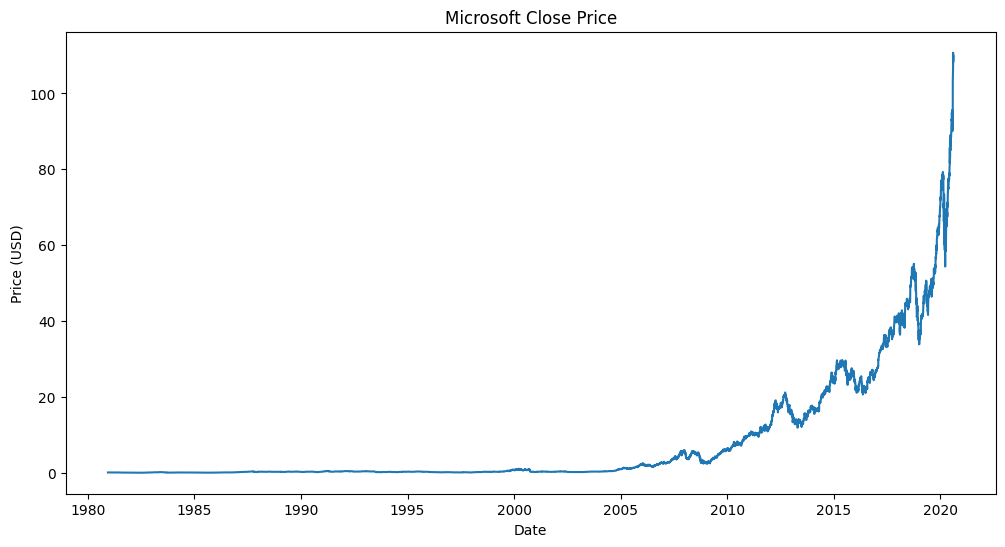

ADF Statistic: 6.904269335652629
p-value: 1.0
❌ Data is NOT stationary. Applying first differencing...


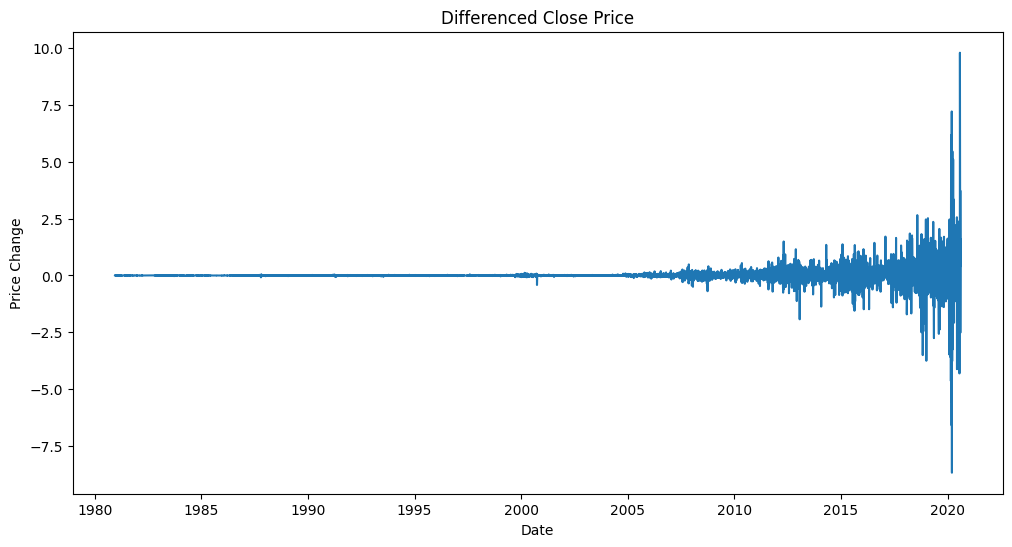

ADF Statistic: -11.855571377604107
p-value: 7.041328038212059e-22
✅ Data is stationary. Ready for ARIMA!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv("cleaned_aapl_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Clean data: Drop NaNs and inf values
df['Close'] = df['Close'].replace([np.inf, -np.inf], np.nan)
df['Close'].dropna(inplace=True)

# Plot Close price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Microsoft Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

# Function to check stationarity
def check_stationarity(series):
    series = series.replace([np.inf, -np.inf], np.nan).dropna()
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("✅ Data is stationary. Ready for ARIMA!")
        return True
    else:
        print("❌ Data is NOT stationary. Applying first differencing...")
        return False

# Run ADF test on Close price
if not check_stationarity(df['Close']):
    # Apply first difference
    df['Close_diff'] = df['Close'] - df['Close'].shift(1)
    df['Close_diff'].dropna(inplace=True)

    # Plot differenced series
    plt.figure(figsize=(12, 6))
    plt.plot(df['Close_diff'])
    plt.title('Differenced Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price Change')
    plt.show()

    # Check stationarity again
    check_stationarity(df['Close_diff'])
